## 1. Introduction

## 2. Import Libraries

In [1]:
# importing libraries 
# TODO -> Use module for scripts 

import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt

import dataexp as dtex # our code
import dataio as dtio # our code 
import preprocessing as pre # our code 

# to display pandas and other elements in html
from IPython.display import display
from IPython.core.display import HTML

# for ordered dictionaries 
from collections import OrderedDict

%matplotlib inline

## 3. Data Pre-Processing & Feature Exploration

In [2]:
# importing data 
path = "data/"
extensions = ".arff"

# get files with .arff extension in path specified
files_path = dtio.file_paths(path, extensions)
# converts .arff files to dataframes 
df_years = dtio.arff2df(files_path, True) 

# create column names 
columns_name = []
for i in range(df_years[0][1].shape[1] - 1):
    columns_name.append("x" + str(i + 1))
columns_name.append("outcome")

# change header/column names 
# convert features to floats (to make sure we have consistency)
# changing the class/outcome column to 0 and 1 (not bankrupt and bankrupt)
# print path and shape for each dataframe imported & convert outcome variable to 0/1
def format_dict_dfs(dict_dfs, col_names, verbose = False):
    for i in range(len(dict_dfs)):
        dict_dfs[i][1].columns = col_names 
        dict_dfs[i][1][col_names[:-1]] = dict_dfs[i][1][col_names[:-1]].apply(pd.to_numeric)
        dict_dfs[i][1]["outcome"] = dict_dfs[i][1]["outcome"].astype("category").cat.codes

        if(verbose == True):
            print("Path: {0}, Shape: {1}".format(dict_dfs[i][0], dict_dfs[i][1].shape))

# format dataframes
format_dict_dfs(df_years, columns_name, True)
            
# since we made sure which dataframe was loaded from (path) and sorted by year 
# make list of different dataframes 
dataframes = [x[1] for x in df_years]

# print head for first case (year 1)
display(dataframes[0].head())
#display(year_one.dtypes)

Path: data/1year.arff, Shape: (7027, 65)
Path: data/2year.arff, Shape: (10173, 65)
Path: data/3year.arff, Shape: (10503, 65)
Path: data/4year.arff, Shape: (9792, 65)
Path: data/5year.arff, Shape: (5910, 65)


x1       x2       x3      x4       x5       x6        x7       x8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

       x9      x10   ...          x56      x57      x58       x59     x60  \
0  1.1389  0.50494   ...     0.121960  0.39718  0.87804  0.001924  8.4160   
1  1.6996  0.49788   ...     0.121300  0.42002  0.85300  0.000000  4.1486   
2  1.3090  0.30408   ...     0.241140  0.81774  0.76599  0.694840  4.9909   
3  1.0571  0.57353   ...     0.054015  0.14207  0.94598  0.000000  4.5746   
4  1.1559  0.38677   ...     0.134850  0.48431  0.86515  0.124440  6.3985   

      x61      x62     x63      x64  outcome  
0  5.1372   82.658  4.4158   7.4277        0  
1  3.2732  107.350  3.4000  60.9870        0  
2  3.9510  134.270  2.7185   5.2078        0  
3  3.6147   86.435  4.2228   5.5497        0  
4  4.3158  127.210  2.8692   7.8980        0  

[5 rows x 65 columns]

### Missing Values in Datasets

year  total_instances  total_instances_with_missing_values  \
0  1_year           7027.0                               3833.0   
1  2_year          10173.0                               6085.0   
2  3_year          10503.0                               5618.0   
3  4_year           9792.0                               5023.0   
4  5_year           5910.0                               2879.0   

   total_instances_without_missing_values  data_loss  
0                                  3194.0     0.5455  
1                                  4088.0     0.5982  
2                                  4885.0     0.5349  
3                                  4769.0     0.5130  
4                                  3031.0     0.4871

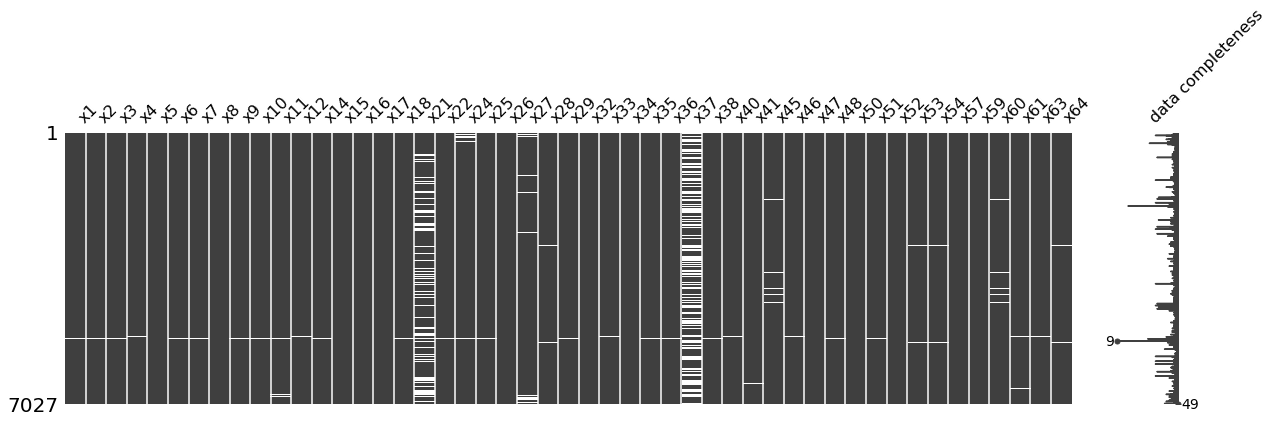

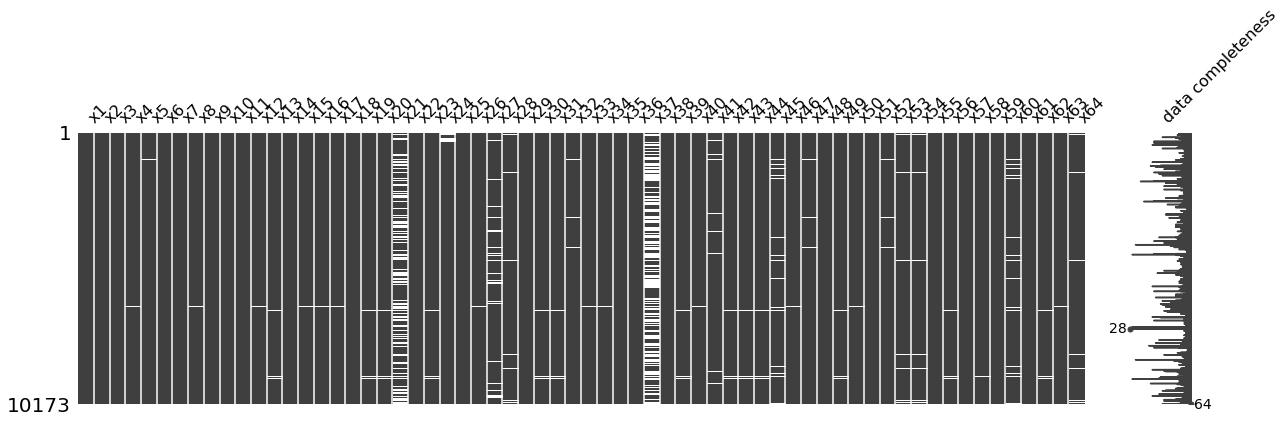

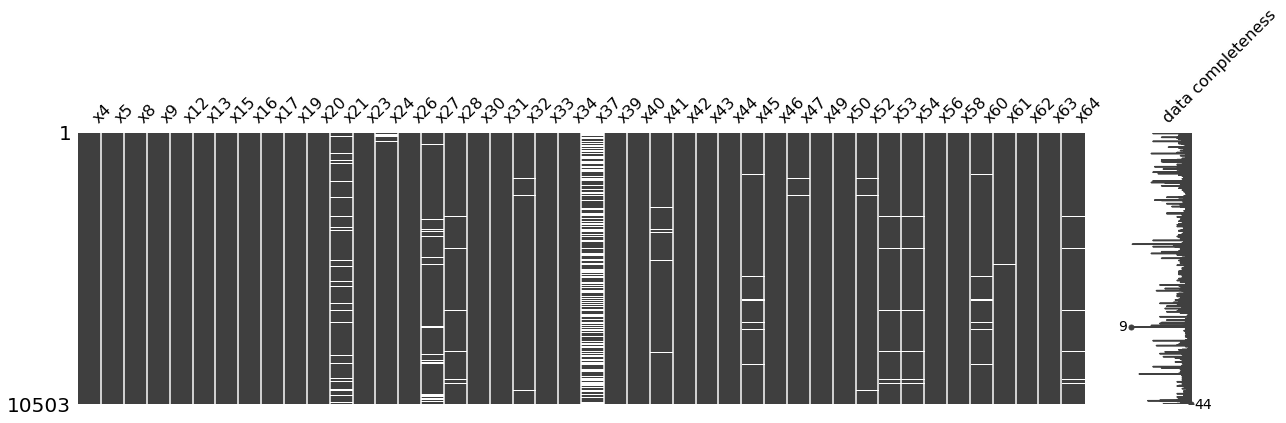

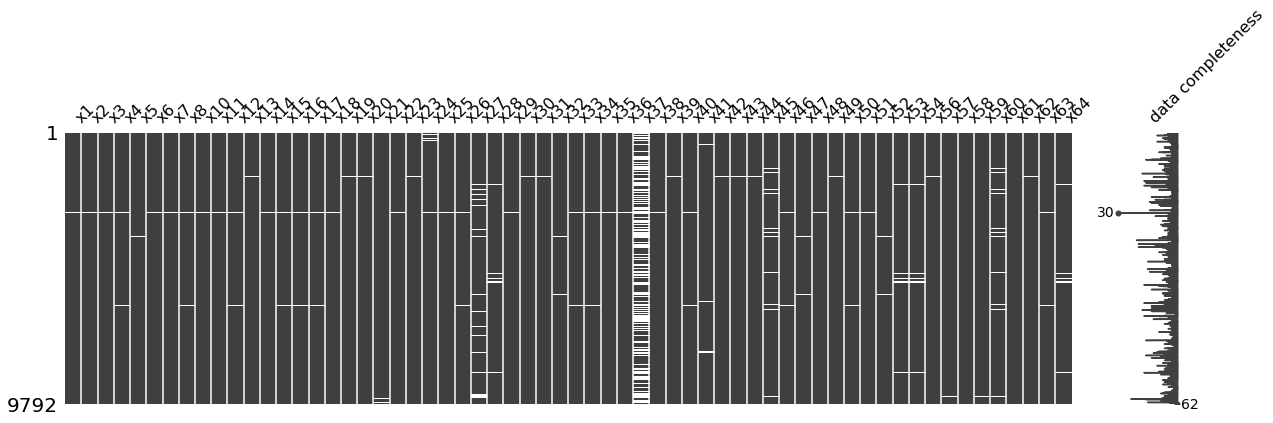

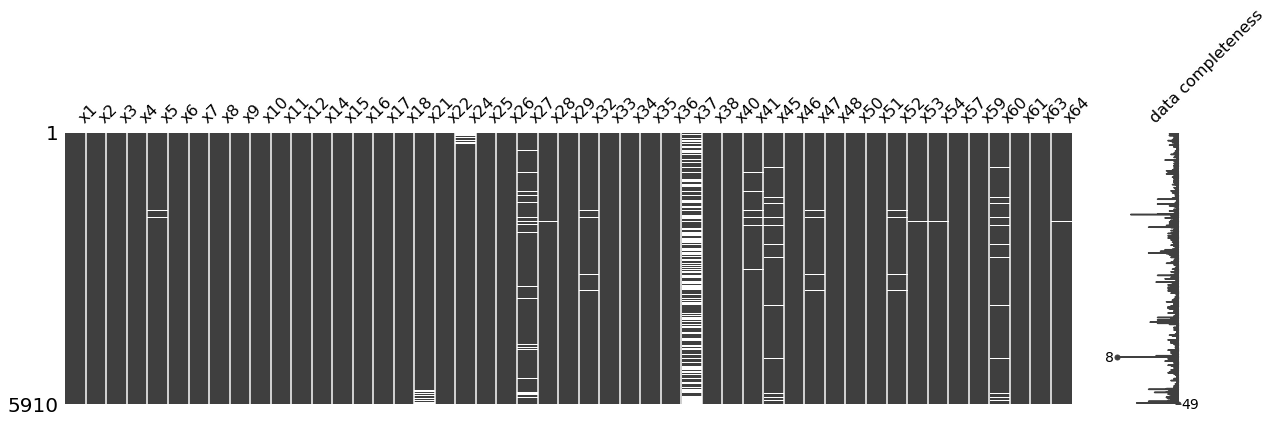

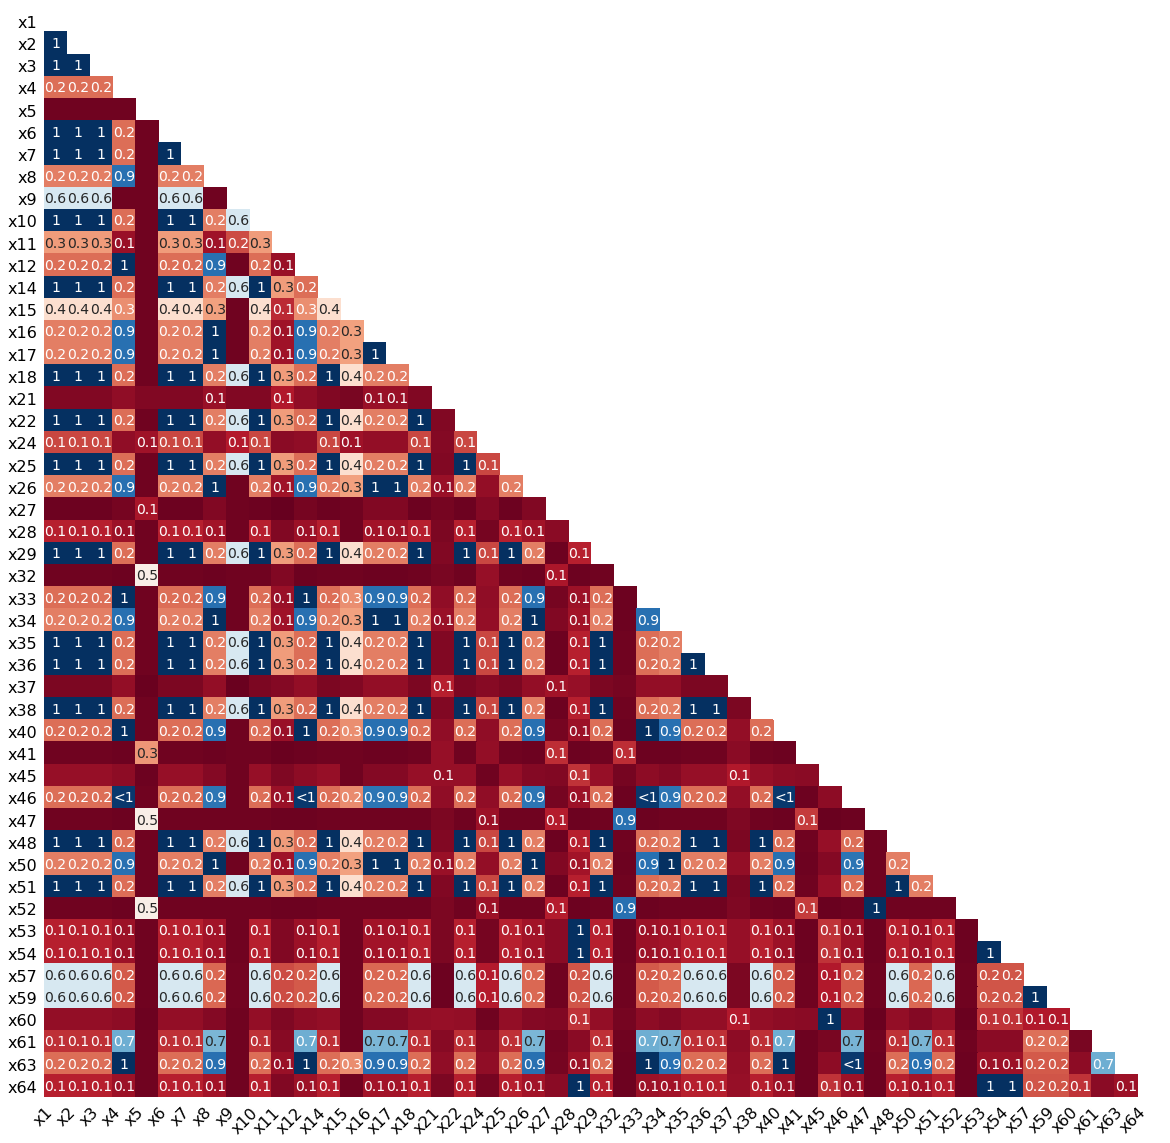

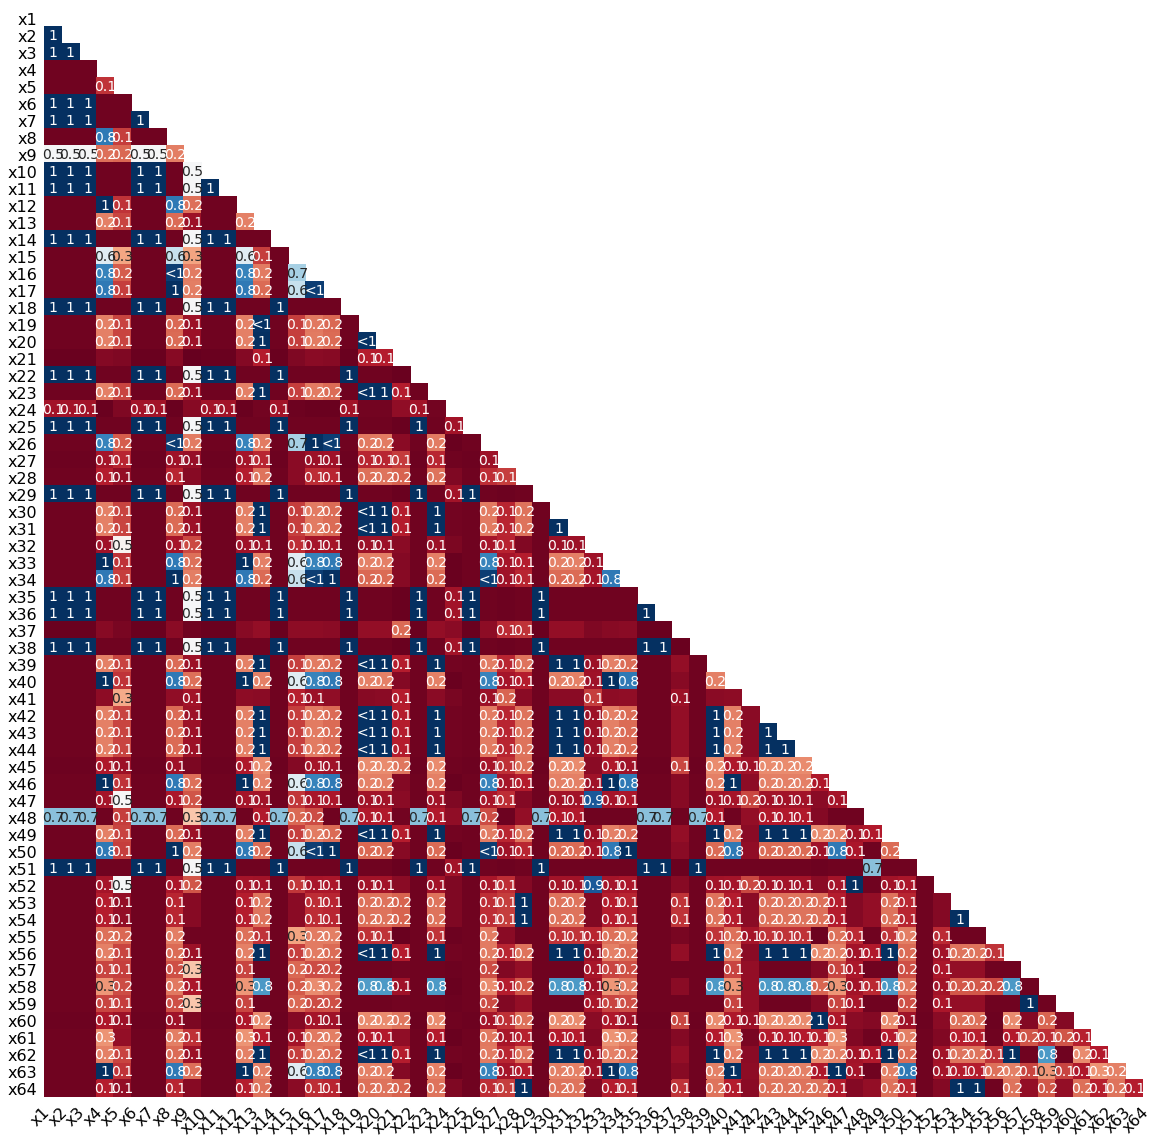

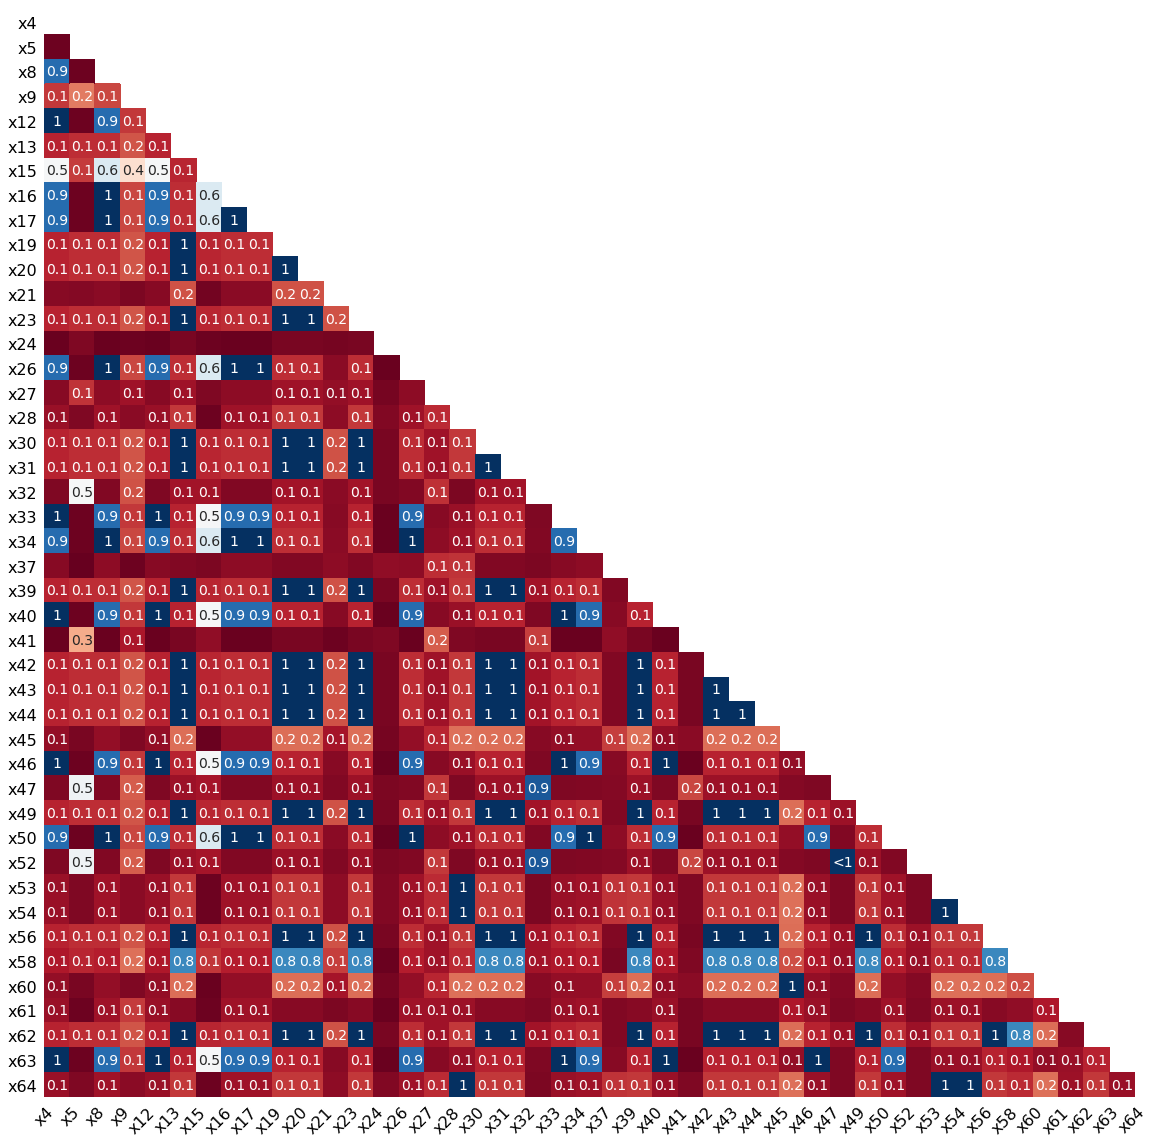

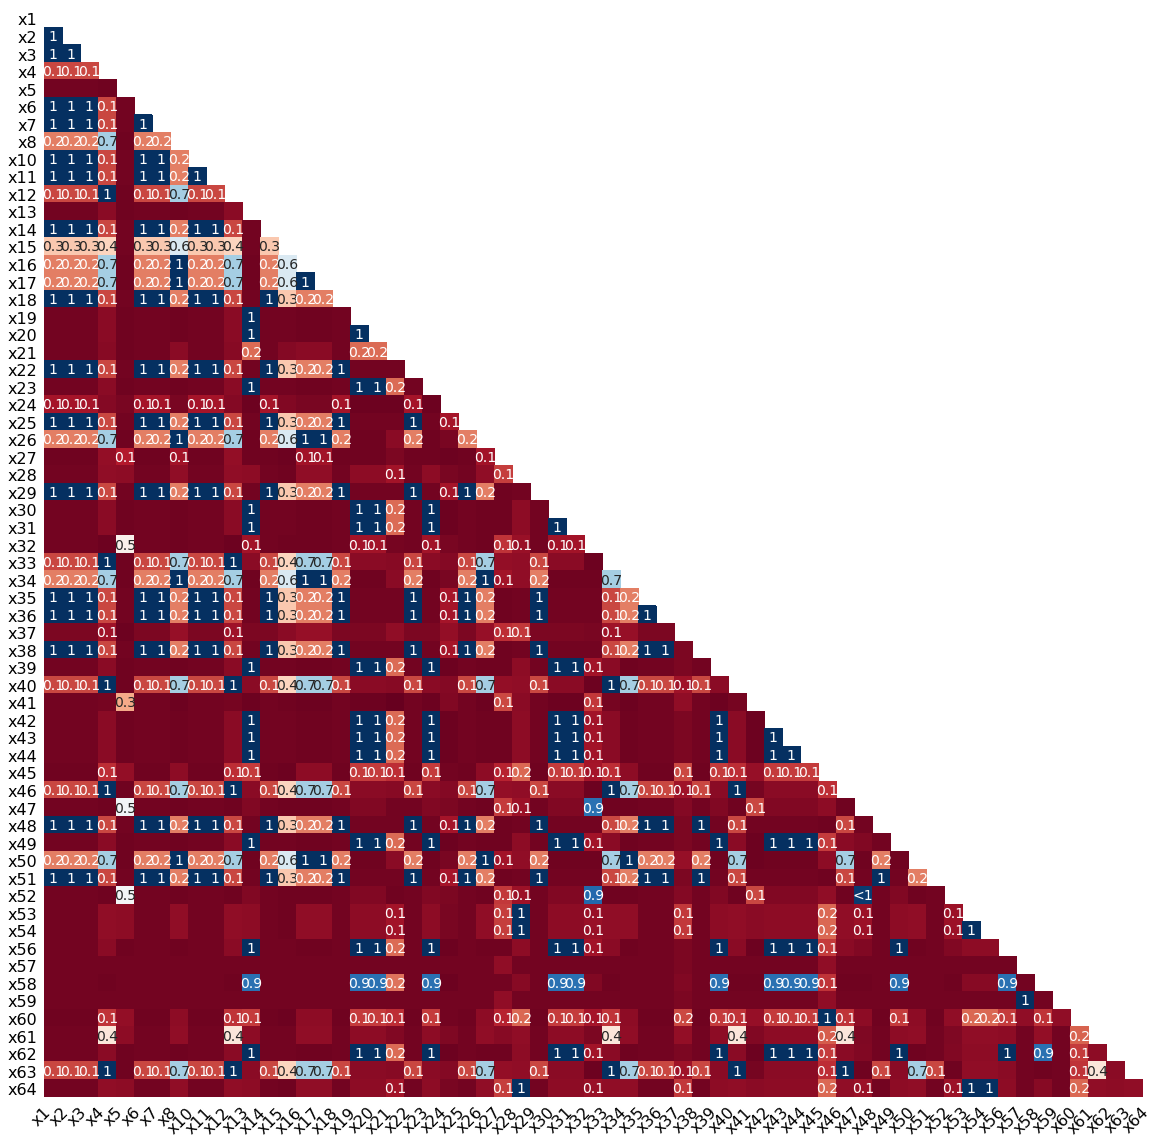

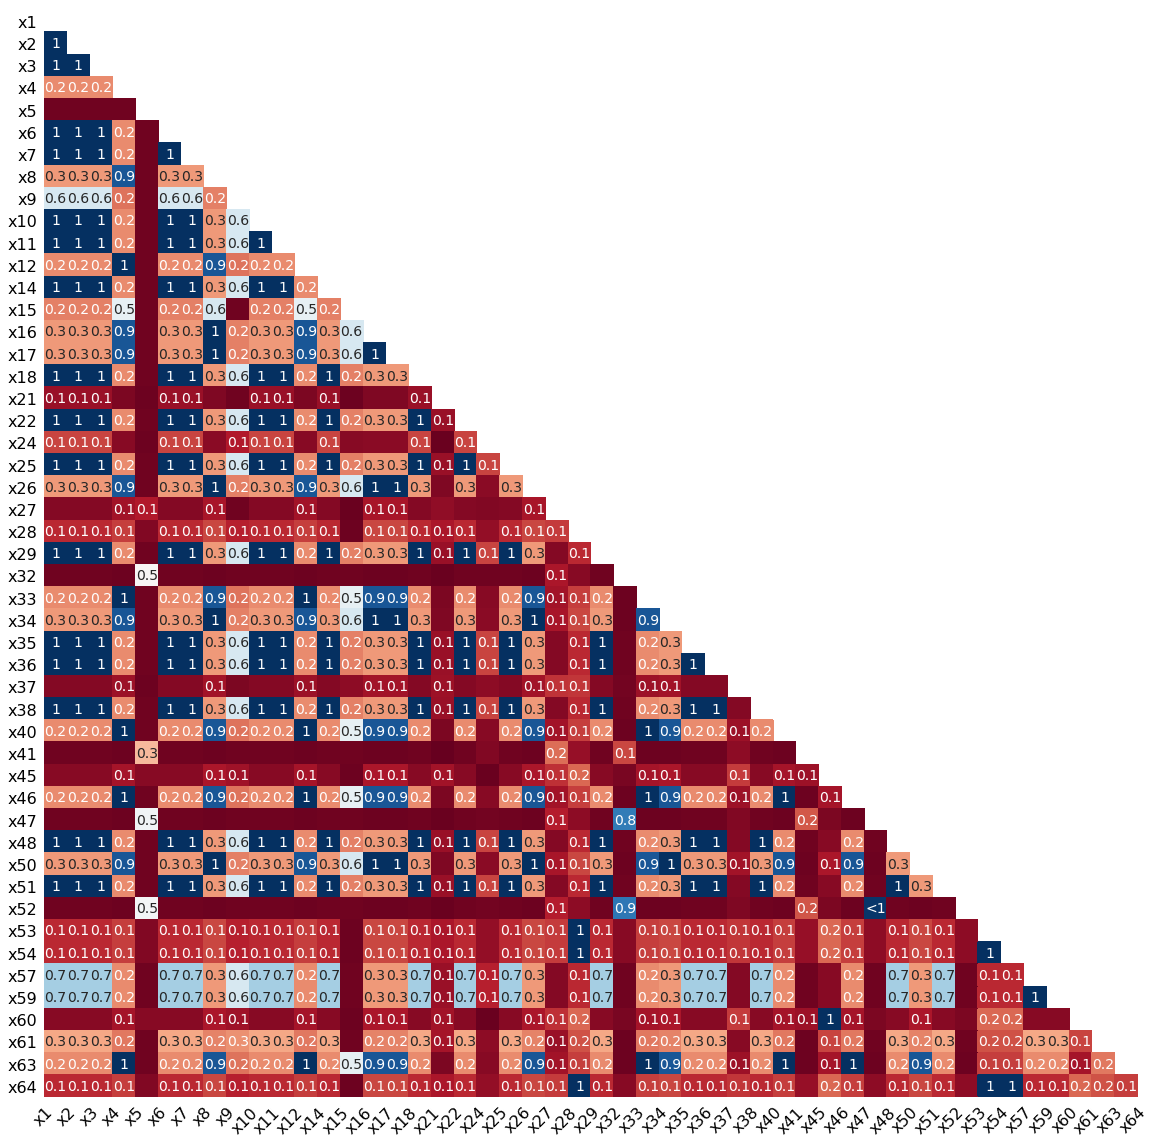

In [3]:
# displaying missing values stats
missing_stats_df = dtex.missing_stats(dataframes)
year_headers = ["1_year" , "2_year", "3_year" , "4_year", "5_year"]
missing_stats_df.insert(loc=0, column= "year", value= year_headers)
display(missing_stats_df)

# nullity matrix 
dtex.nullity_matrix(dataframes, include_all = False)
# heatmap - nullity correlation 
dtex.nullity_heatmap(dataframes, include_all = False)

#### Data Imputation 

In [4]:
# save imputation data if files dont exists + retrieve
imp_common_path = path + "imputation"

# mean imputation
imp_mean_path = imp_common_path + "_mean/"
dtio.df2arff_function(imp_mean_path, year_headers, pre.mean_imputation, dataframes)
imp_mean_dfs = dtio.arff2df(dtio.file_paths(imp_mean_path, extensions), True)  
format_dict_dfs(imp_mean_dfs, columns_name, True)

# median imputation
imp_median_path = imp_common_path + "_median/"
dtio.df2arff_function(imp_median_path, year_headers, pre.median_imputation, dataframes)
imp_median_dfs = dtio.arff2df(dtio.file_paths(imp_median_path, extensions), True)  
format_dict_dfs(imp_median_dfs, columns_name, True)

# mode imputation 
imp_mode_path = imp_common_path + "_mode/"
dtio.df2arff_function(imp_mode_path, year_headers, pre.mode_imputation, dataframes)
imp_mode_dfs = dtio.arff2df(dtio.file_paths(imp_mode_path, extensions), True)  
format_dict_dfs(imp_mode_dfs, columns_name, True)

# expectation maximization imputation
imp_em_path = imp_common_path + "_em/"
dtio.df2arff_function(imp_em_path, year_headers, pre.em_imputation, dataframes, "float", 60)
imp_em_dfs = dtio.arff2df(dtio.file_paths(imp_em_path, extensions), True)  
format_dict_dfs(imp_em_dfs, columns_name, True)

# multivariate imputation by chained equations imputation
imp_mice_path = imp_common_path + "_mice/"
dtio.df2arff_function(imp_mice_path, year_headers, pre.mice_imputation, dataframes, "float")
imp_mice_dfs = dtio.arff2df(dtio.file_paths(imp_mice_path, extensions), True)  
format_dict_dfs(imp_mice_dfs, columns_name, True)

# k nearest neighbours imputation
imp_knn_path = imp_common_path + "_knn/"
dtio.df2arff_function(imp_knn_path, year_headers, pre.knn_imputation, dataframes, "float", 100)
imp_knn_dfs = dtio.arff2df(dtio.file_paths(imp_knn_path, extensions), True)
format_dict_dfs(imp_knn_dfs, columns_name, True)

# creating ordered dictionary for all different imputation methods 
imp_dfs_dict = OrderedDict()
imp_dfs_dict["Mean"] = [x[1] for x in imp_mean_dfs]
imp_dfs_dict["Median"] = [x[1] for x in imp_median_dfs]
imp_dfs_dict["Mode"] = [x[1] for x in imp_mode_dfs]
imp_dfs_dict["Em"] = [x[1] for x in imp_em_dfs]
imp_dfs_dict["Mice"] = [x[1] for x in imp_mice_dfs]
imp_dfs_dict["Knn"] = [x[1] for x in imp_knn_dfs]

Path: data/imputation_mean/1_year.arff, Shape: (7027, 65)
Path: data/imputation_mean/2_year.arff, Shape: (10173, 65)
Path: data/imputation_mean/3_year.arff, Shape: (10503, 65)
Path: data/imputation_mean/4_year.arff, Shape: (9792, 65)
Path: data/imputation_mean/5_year.arff, Shape: (5910, 65)
Path: data/imputation_median/1_year.arff, Shape: (7027, 65)
Path: data/imputation_median/2_year.arff, Shape: (10173, 65)
Path: data/imputation_median/3_year.arff, Shape: (10503, 65)
Path: data/imputation_median/4_year.arff, Shape: (9792, 65)
Path: data/imputation_median/5_year.arff, Shape: (5910, 65)
Path: data/imputation_mode/1_year.arff, Shape: (7027, 65)
Path: data/imputation_mode/2_year.arff, Shape: (10173, 65)
Path: data/imputation_mode/3_year.arff, Shape: (10503, 65)
Path: data/imputation_mode/4_year.arff, Shape: (9792, 65)
Path: data/imputation_mode/5_year.arff, Shape: (5910, 65)
Path: data/imputation_em/1_year.arff, Shape: (7027, 65)
Path: data/imputation_em/2_year.arff, Shape: (10173, 65)
P

### Imbalanced Data 

In [5]:
imbalanced_stats_df = dtex.imbalanced_stats(dataframes, 'outcome')
imbalanced_stats_df.insert(loc=0, column= "year", value= year_headers)
display(imbalanced_stats_df)

year  label_0  label_1  minortiy_label  minority_percentage
0  1_year   6756.0    271.0             1.0             0.038566
1  2_year   9773.0    400.0             1.0             0.039320
2  3_year  10008.0    495.0             1.0             0.047129
3  4_year   9277.0    515.0             1.0             0.052594
4  5_year   5500.0    410.0             1.0             0.069374

#### Oversampling Datasets using synthetic minority over-sampling technique (SMOTE)

In [6]:
# creating ordered dictionary for all different oversampled imputation methods 
os_dfs_dict = OrderedDict()

# apply smote and add to dictionary
for key in imp_dfs_dict:
    print("Imputation Method: " + key)
    os_dfs_dict[key] = pre.oversample_smote(imp_dfs_dict[key], columns = columns_name,  verbose = True)
    print("#######################################################################\n")

Imputation Method: Mean
original dataset (labels): {0: 6756, 1: 271}
total: 7027
resampled dataset (labels): {0: 6756, 1: 6756}
total: 13512

original dataset (labels): {0: 9773, 1: 400}
total: 10173
resampled dataset (labels): {0: 9773, 1: 9773}
total: 19546

original dataset (labels): {0: 10008, 1: 495}
total: 10503
resampled dataset (labels): {0: 10008, 1: 10008}
total: 20016

original dataset (labels): {0: 9277, 1: 515}
total: 9792
resampled dataset (labels): {0: 9277, 1: 9277}
total: 18554

original dataset (labels): {0: 5500, 1: 410}
total: 5910
resampled dataset (labels): {0: 5500, 1: 5500}
total: 11000

#######################################################################

Imputation Method: Median
original dataset (labels): {0: 6756, 1: 271}
total: 7027
resampled dataset (labels): {0: 6756, 1: 6756}
total: 13512

original dataset (labels): {0: 9773, 1: 400}
total: 10173
resampled dataset (labels): {0: 9773, 1: 9773}
total: 19546

original dataset (labels): {0: 10008, 1: 495}

### Feature Exploration



#### Feature Magnitude (ranges)

In [7]:
def multi_dataframes(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

# display various ranges 
pd.options.display.float_format = '{:.4f}'.format
for i in range(len(dataframes)):    
    range_tables = []
    describe = pd.DataFrame(dataframes[i].describe().T)
    describe = describe.drop(describe.index[len(describe)-1])

    for g, tmp_df in describe.groupby(np.arange(len(describe)) // 16):
        range_tables.append(tmp_df[["min","max"]])
    
    print(year_headers[i])
    display(multi_dataframes(range_tables))

1_year


2_year


3_year


4_year


5_year


#### Feature Distributions

1_year


/home/delinvas/anaconda3/envs/ics5110/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


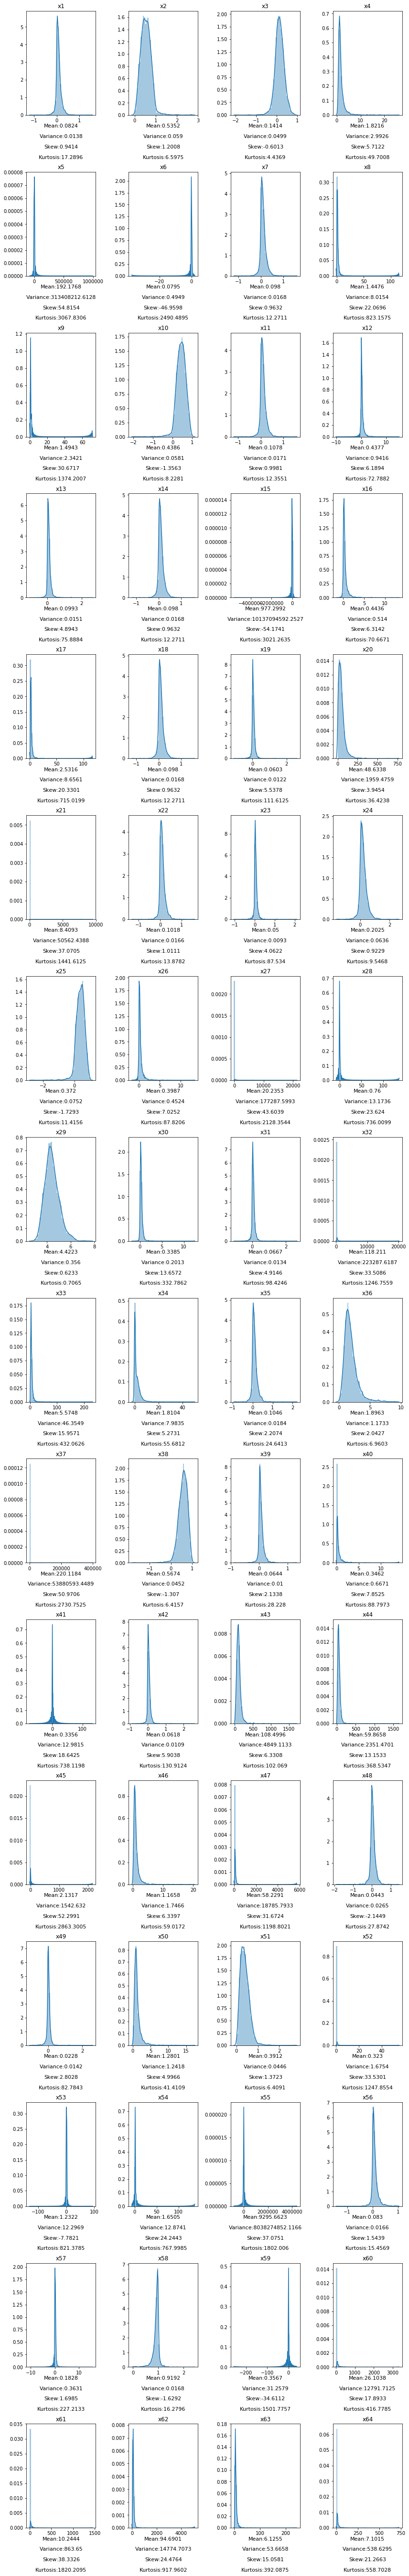

2_year


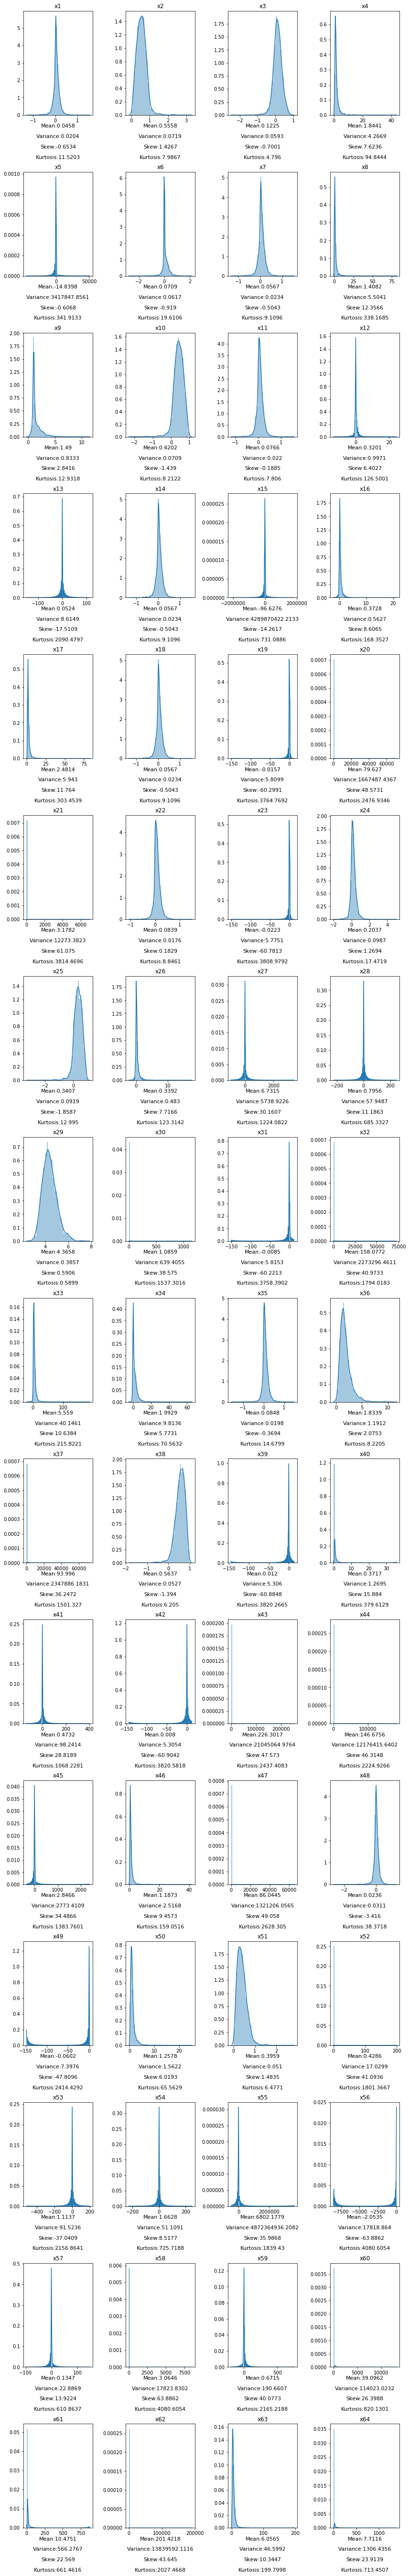

3_year


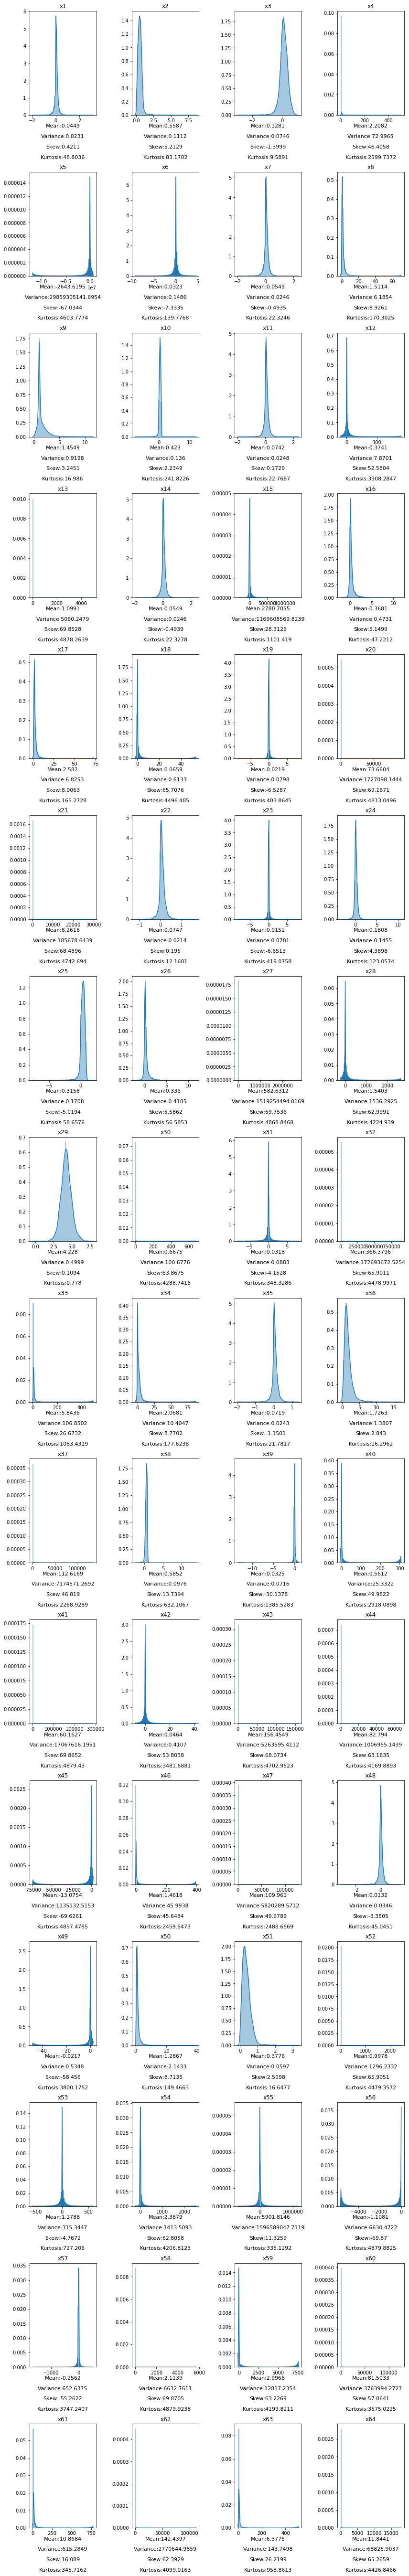

4_year


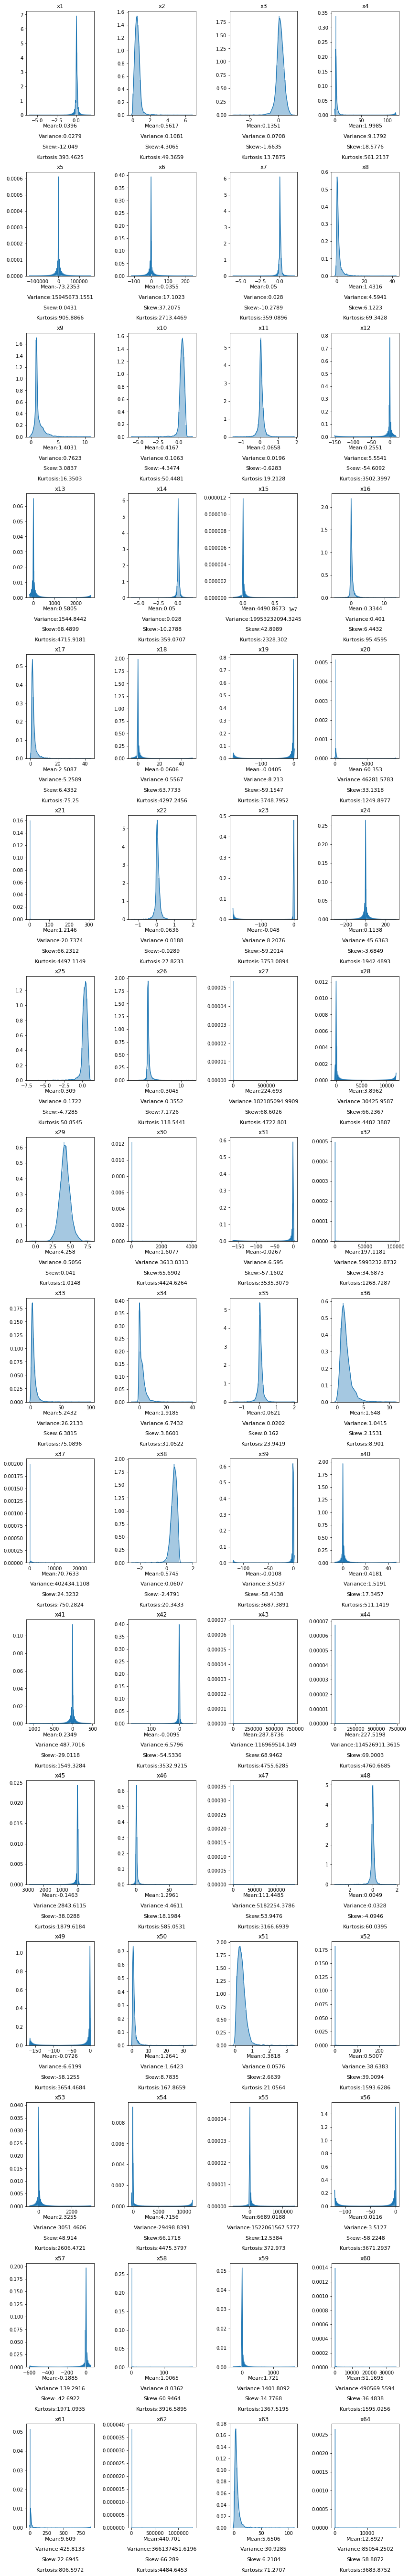

5_year


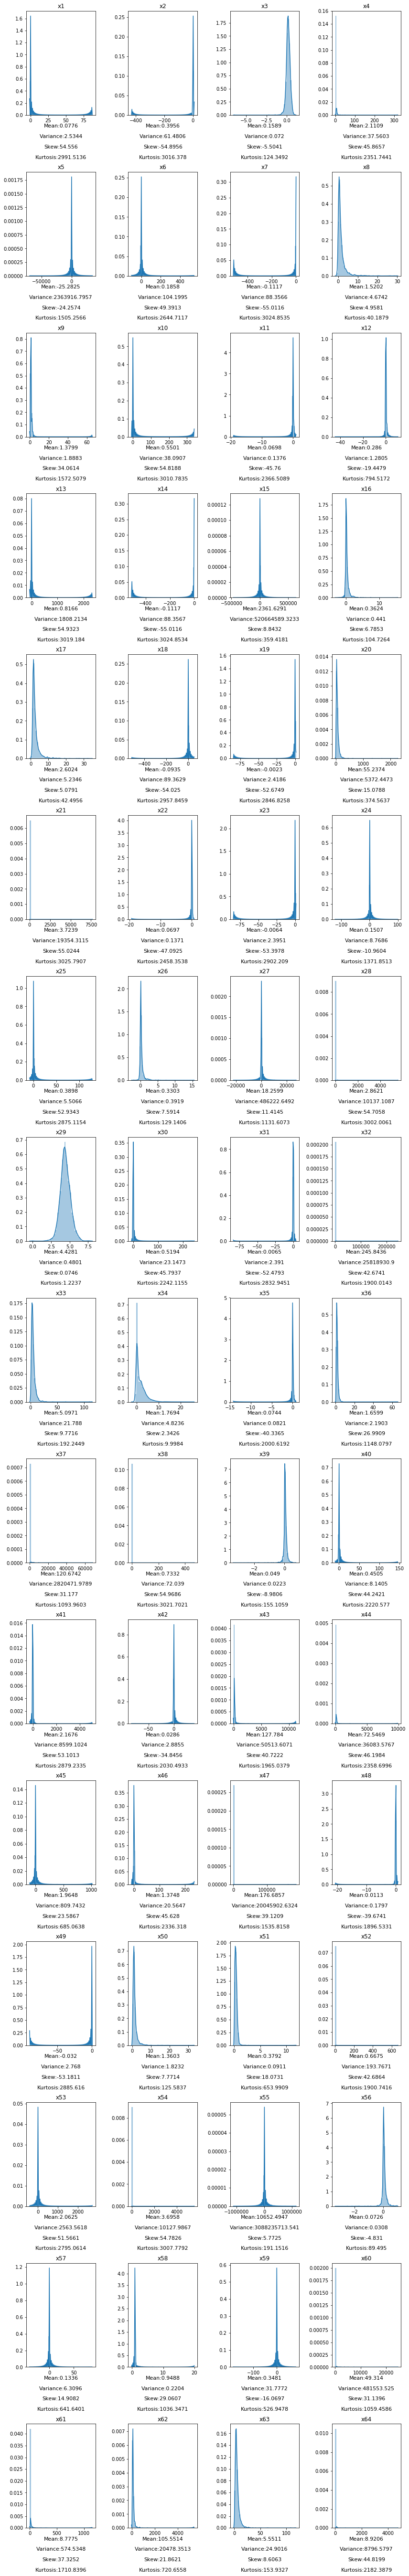

In [11]:
plot_col = 4
plot_rows = int((dataframes[0].shape[1] - 1) / 4)
plot_columns = dataframes[0].columns[:-1]

# creates subplot for feature distributions + stats
def plot_dist_df(df):
    tmp_drop = df.dropna()
    fig, ax = plt.subplots(plot_rows, plot_col, sharex= False, sharey= False, figsize=(12, 75))    
    for j in range(plot_col * plot_rows):
        column_name = plot_columns[j]
        row_index = int(j / plot_col) 
        col_index = j % plot_col
        
        feature = np.array(tmp_drop[column_name].values)
        tmp_ax = ax[row_index][col_index]
        tmp_ax.set_title(column_name)
        
        tmp_stat = "Mean:{0}".format(round(feature.mean(), 4))
        tmp_ax.text(0.5,-0.12, tmp_stat , size=11, ha="center", transform=tmp_ax.transAxes)
        
        tmp_stat = "Variance:{0}".format(round(feature.var(), 4))
        tmp_ax.text(0.5,-0.22, tmp_stat , size=11, ha="center", transform=tmp_ax.transAxes)

        tmp_stat = "Skew:{0}".format(round(skew(feature), 4))
        tmp_ax.text(0.5,-0.32, tmp_stat , size=11, ha="center", transform=tmp_ax.transAxes)
        
        tmp_stat = "Kurtosis:{0}".format(round(kurtosis(feature), 4))
        tmp_ax.text(0.5,-.42, tmp_stat , size=11, ha="center", transform=tmp_ax.transAxes)
        
        sns.distplot(feature, label= column_name ,ax=tmp_ax)
    
    fig.tight_layout()
    plt.show()

# plot feature distributions and stats for each year
for i in range(len(dataframes)):    
    print(year_headers[i])
    plot_dist_df(dataframes[i])

## 4. Dimensionality Reduction and Feature Selection

## 5. Data Modeling and Classification

## 6. Results from Different Experiments 

## 7. Conclusions 

TODO: 

Check imputation is done correctly because of null values 

Check assumptions for models which will be used

David Silver

In [9]:
# #TESTING
# from decision_tree import DecisionTree 
# from sklearn.metrics import accuracy_score 
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.model_selection import train_test_split
# import time

# X = os_dfs_dict["Mean"][0].drop("outcome", axis=1).values
# y = os_dfs_dict["Mean"][0]["outcome"].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

# # decision_tree = DecisionTree()
# # start = time.time()
# # decision_tree.fit(X_train, y_train)    
# # end = time.time()
# # print(end - start)

# # y_pred = decision_tree.predict(X_test)  
# # print(accuracy_score(y_test, y_pred))

# classifier = DecisionTreeClassifier()
# start = time.time()
# classifier.fit(X_train, y_train)
# end = time.time()
# #print(end - start)
# y_pred = classifier.predict(X_test)
# print("Decision Tree Sklearn: " + str(accuracy_score(y_test, y_pred)))
 
# from decision_tree import DecisionTree
# decision_tree = DecisionTree()
# decision_tree.fit(X_train, y_train)
# y_pred = decision_tree.predict(X_test)
# print("Decision Tree : " + str(accuracy_score(y_test, y_pred)))

In [10]:
# from random_forest import RandomForest 
# random_forest =  RandomForest(n_estimators = 5, max_features = .8)
# random_forest.fit(X_train, y_train)
# y_pred = random_forest.predict(X_test)
# print("Random Forest: " + str(accuracy_score(y_test, y_pred)))

# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators = 5, max_features = .8)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print("Random Forest Sklearn: " + str(accuracy_score(y_test, y_pred)))
